In [1]:
# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import numpy as np
from numpy import percentile
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [3]:
# Load the data
url = "https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Avocado/avocado.csv.zip?raw=true"
dataset = pd.read_csv(url, compression='zip')

In [4]:
dataset.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
dataset.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [6]:
#The Feature "Unnamed:0" is just a representation of the indexes, so it's useless to keep it, lets remove it !

In [8]:
dataset.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
dataset.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [11]:
dataset['Date']=pd.to_datetime(dataset['Date'])
dataset['Month']=dataset['Date'].apply(lambda x:x.month)
dataset['Day']=dataset['Date'].apply(lambda x:x.day)
dataset.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


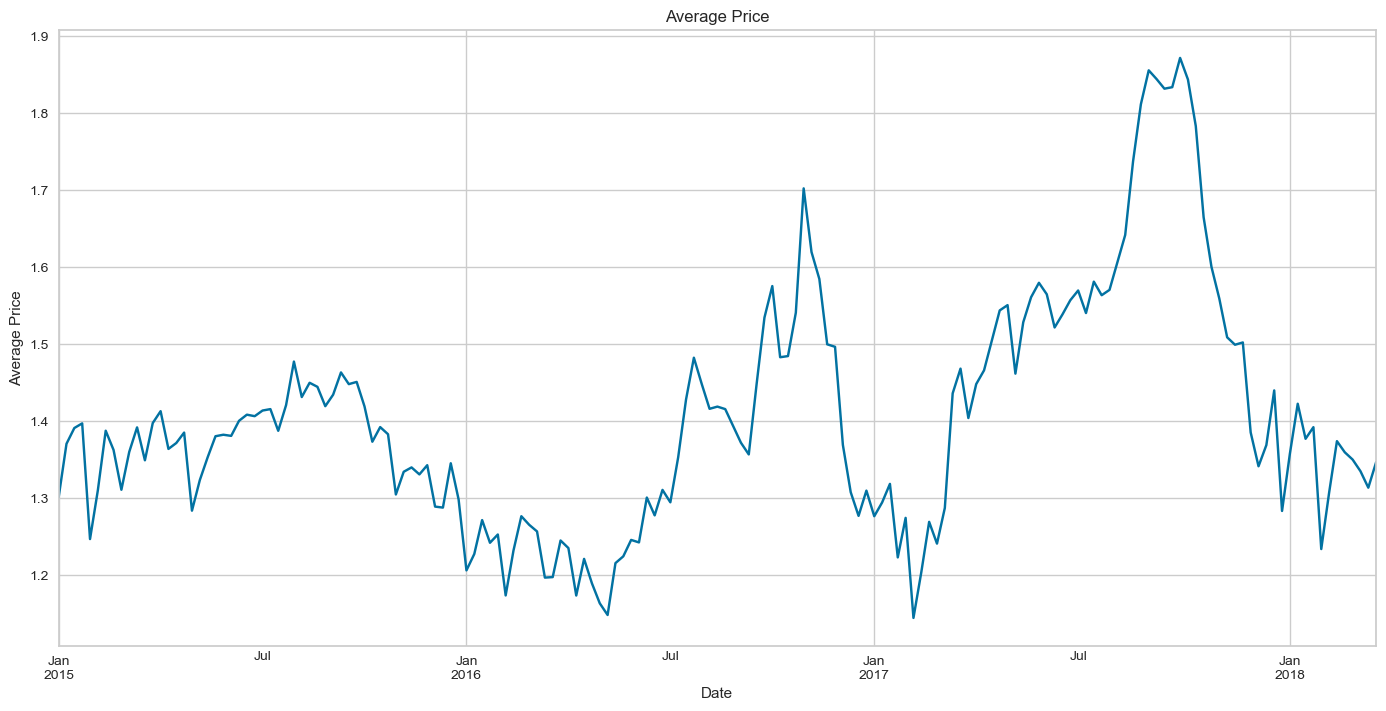

In [13]:
#Analysis of Average Prices
numeric_columns = dataset.select_dtypes(include=[float, int]).columns
byDate = dataset.groupby('Date')[numeric_columns].mean()

# Plotting the average price
plt.figure(figsize=(17,8), dpi=100)
byDate['AveragePrice'].plot()
plt.title('Average Price')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()

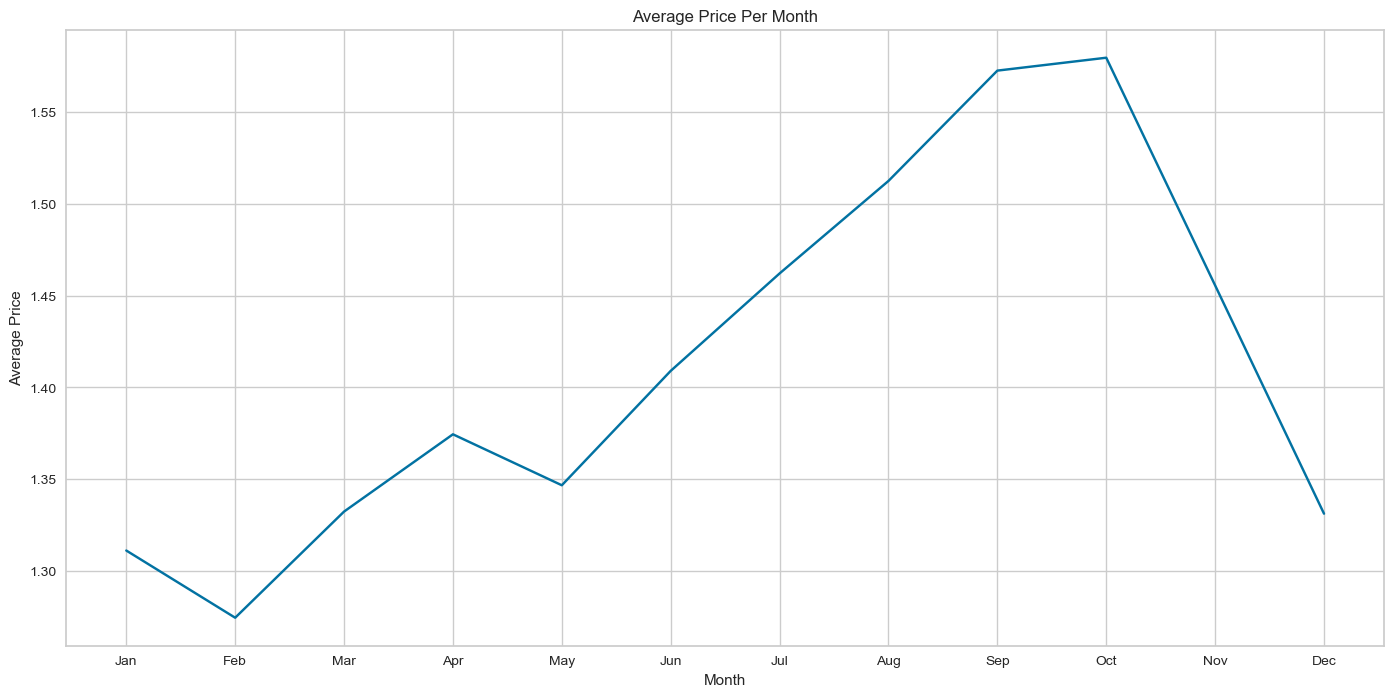

In [15]:
# Ensure 'Date' column is in datetime format
dataset['Date'] = pd.to_datetime(dataset['Date'])

# Extract month from 'Date' column and create a 'Month' column
dataset['Month'] = dataset['Date'].dt.month

# Select only numeric columns
numeric_columns = dataset.select_dtypes(include=[float, int]).columns

# Group by the 'Month' column and calculate the mean of numeric columns
byMonth = dataset.groupby('Month')[numeric_columns].mean()

# Plotting the average price per month
plt.figure(figsize=(17,8), dpi=100)
plt.plot(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"], byMonth['AveragePrice'])
plt.title('Average Price Per Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.show()


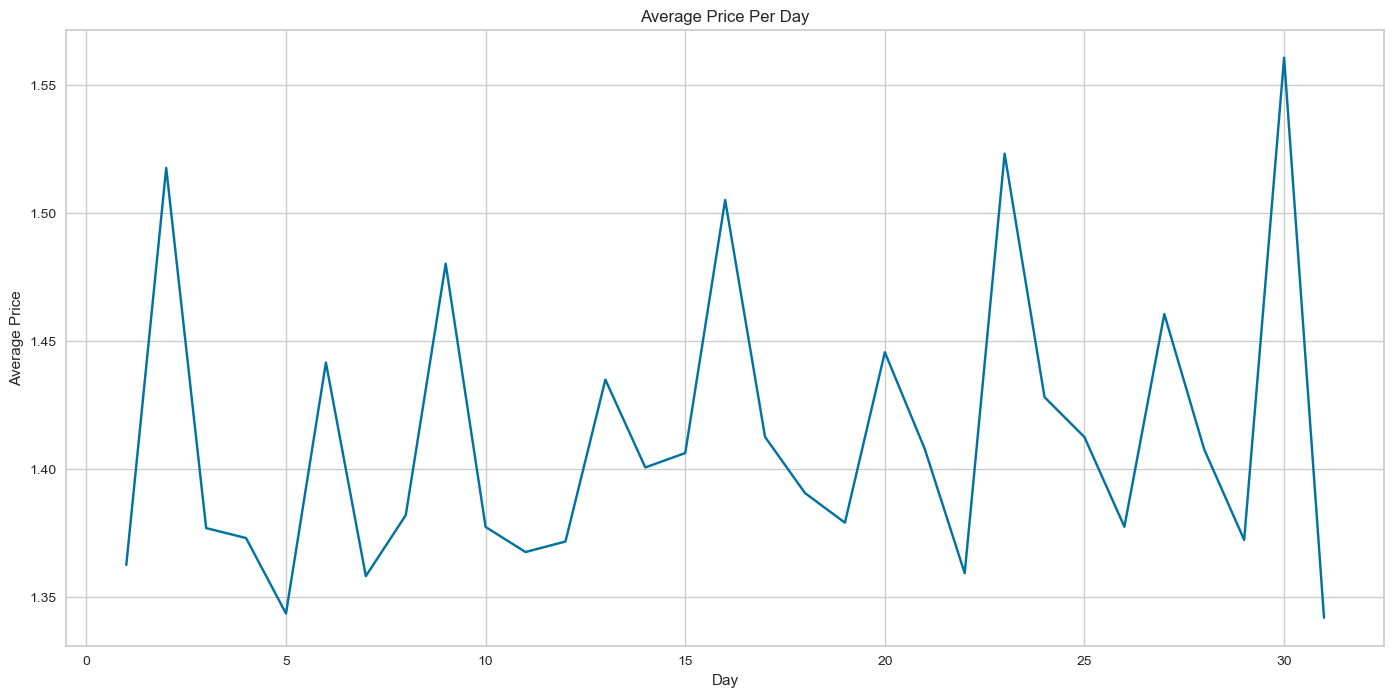

In [16]:
# Ensure 'Date' column is in datetime format
dataset['Date'] = pd.to_datetime(dataset['Date'])

# Extract day from 'Date' column and create a 'Day' column
dataset['Day'] = dataset['Date'].dt.day

# Select only numeric columns
numeric_columns = dataset.select_dtypes(include=[float, int]).columns

# Group by the 'Day' column and calculate the mean of numeric columns
byDay = dataset.groupby('Day')[numeric_columns].mean()

# Plotting the average price per day
plt.figure(figsize=(17,8), dpi=100)
byDay['AveragePrice'].plot()
plt.title('Average Price Per Day')
plt.xlabel('Day')
plt.ylabel('Average Price')
plt.show()


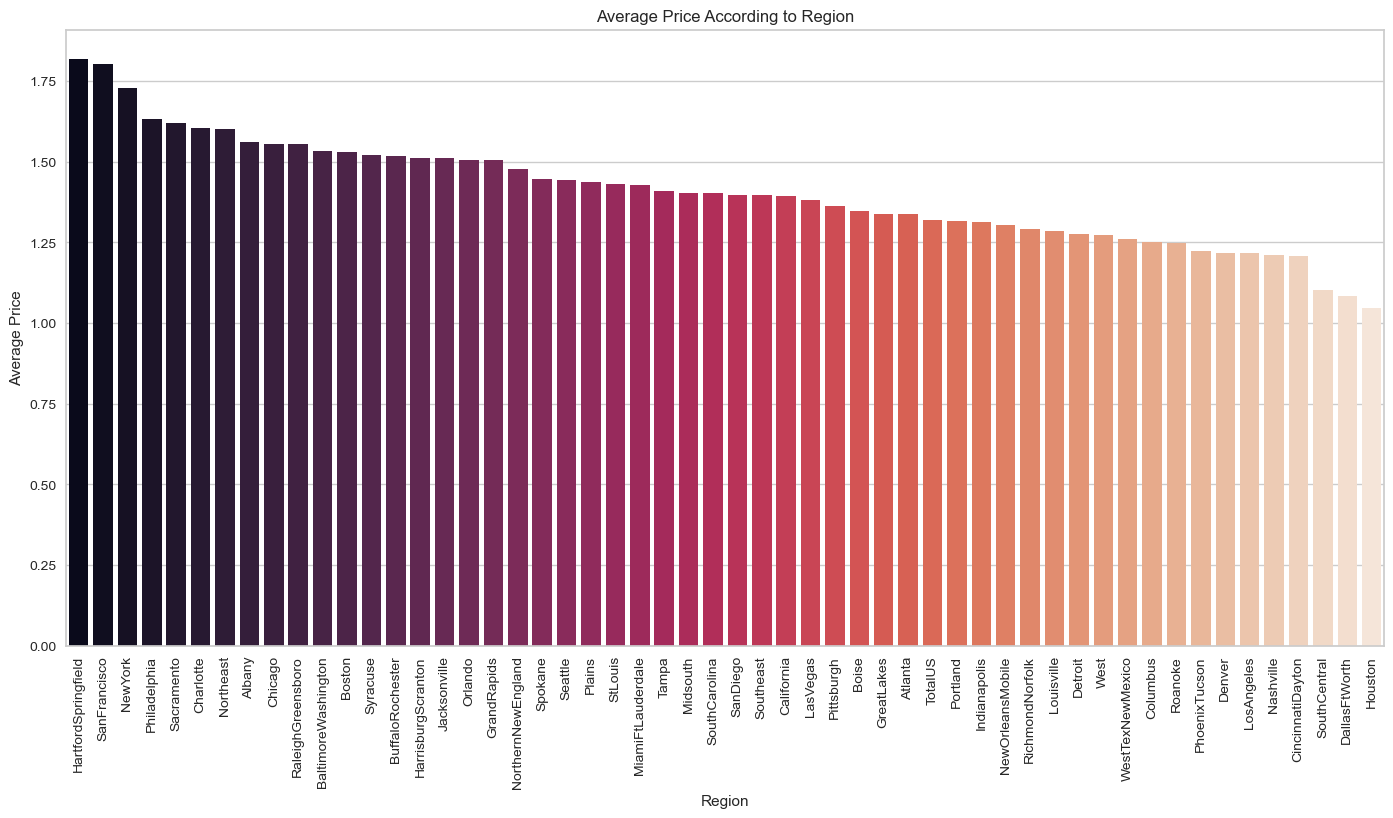

In [18]:
# Ensure 'Date' column is in datetime format
dataset['Date'] = pd.to_datetime(dataset['Date'])

# Select only numeric columns
numeric_columns = dataset.select_dtypes(include=[float, int]).columns

# Group by the 'region' column and calculate the mean of numeric columns
byRegion = dataset.groupby('region')[numeric_columns].mean()

# Sort the DataFrame by 'AveragePrice' in descending order
byRegion.sort_values(by=['AveragePrice'], ascending=False, inplace=True)

# Reset the index to make 'region' a column
byRegion.reset_index(inplace=True)

# Plotting the average price according to region
plt.figure(figsize=(17,8), dpi=100)
sns.barplot(x='region', y='AveragePrice', data=byRegion, palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price According to Region')
plt.show()


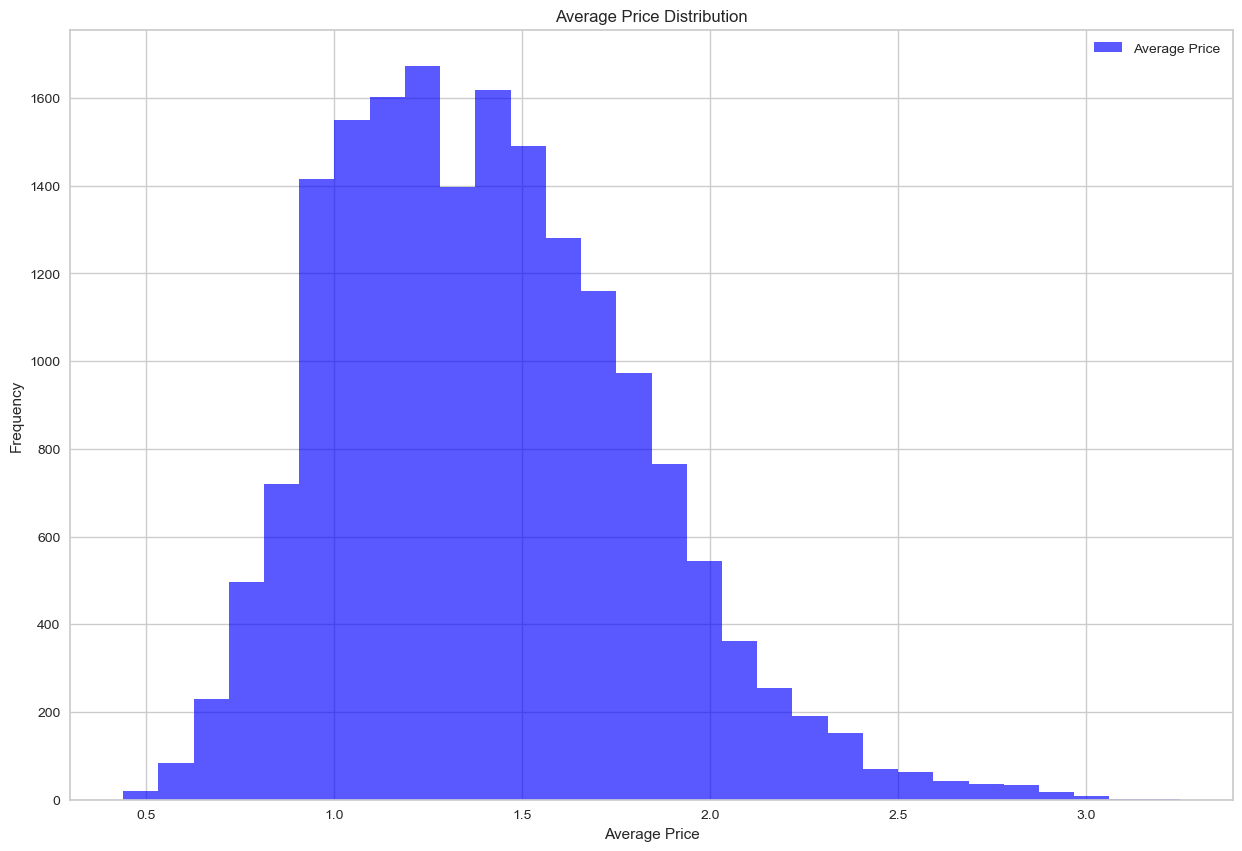

In [19]:
plt.figure(figsize=(15,10),dpi=100)
dataset["AveragePrice"].plot(kind="hist",color="blue",bins=30,grid=True,alpha=0.65,label="Average Price")
plt.legend()
plt.xlabel("Average Price")
plt.title("Average Price Distribution")
plt.show()

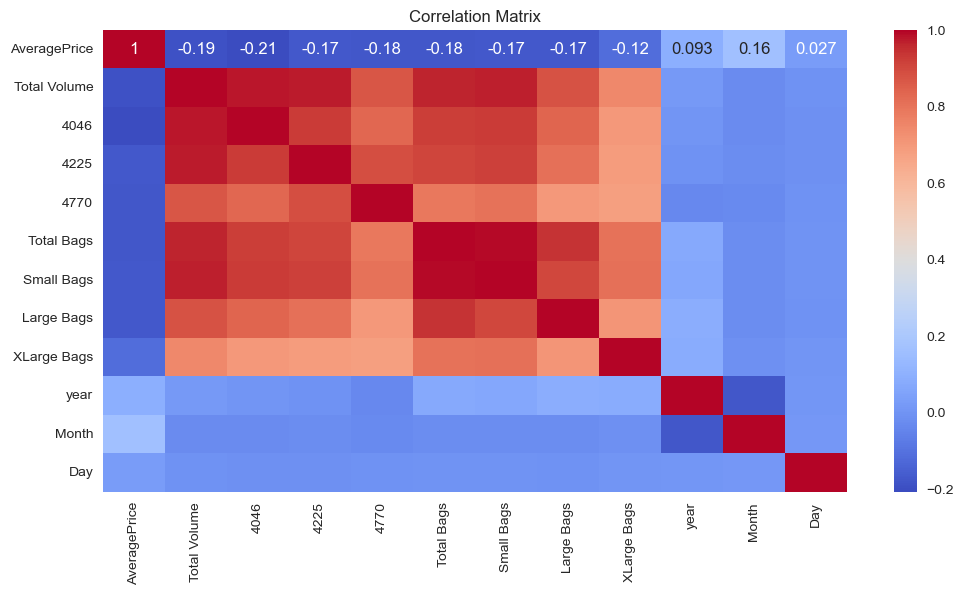

In [24]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

# Select only numeric columns
numeric_columns = dataset.select_dtypes(include=[float, int]).columns
numeric_dataset = dataset[numeric_columns]
corr_df = numeric_dataset.corr(method='pearson')

# Plot the heatmap
plt.figure(figsize=(12,6), dpi=100)
sns.heatmap(corr_df, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

C:\Users\shala\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shala\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


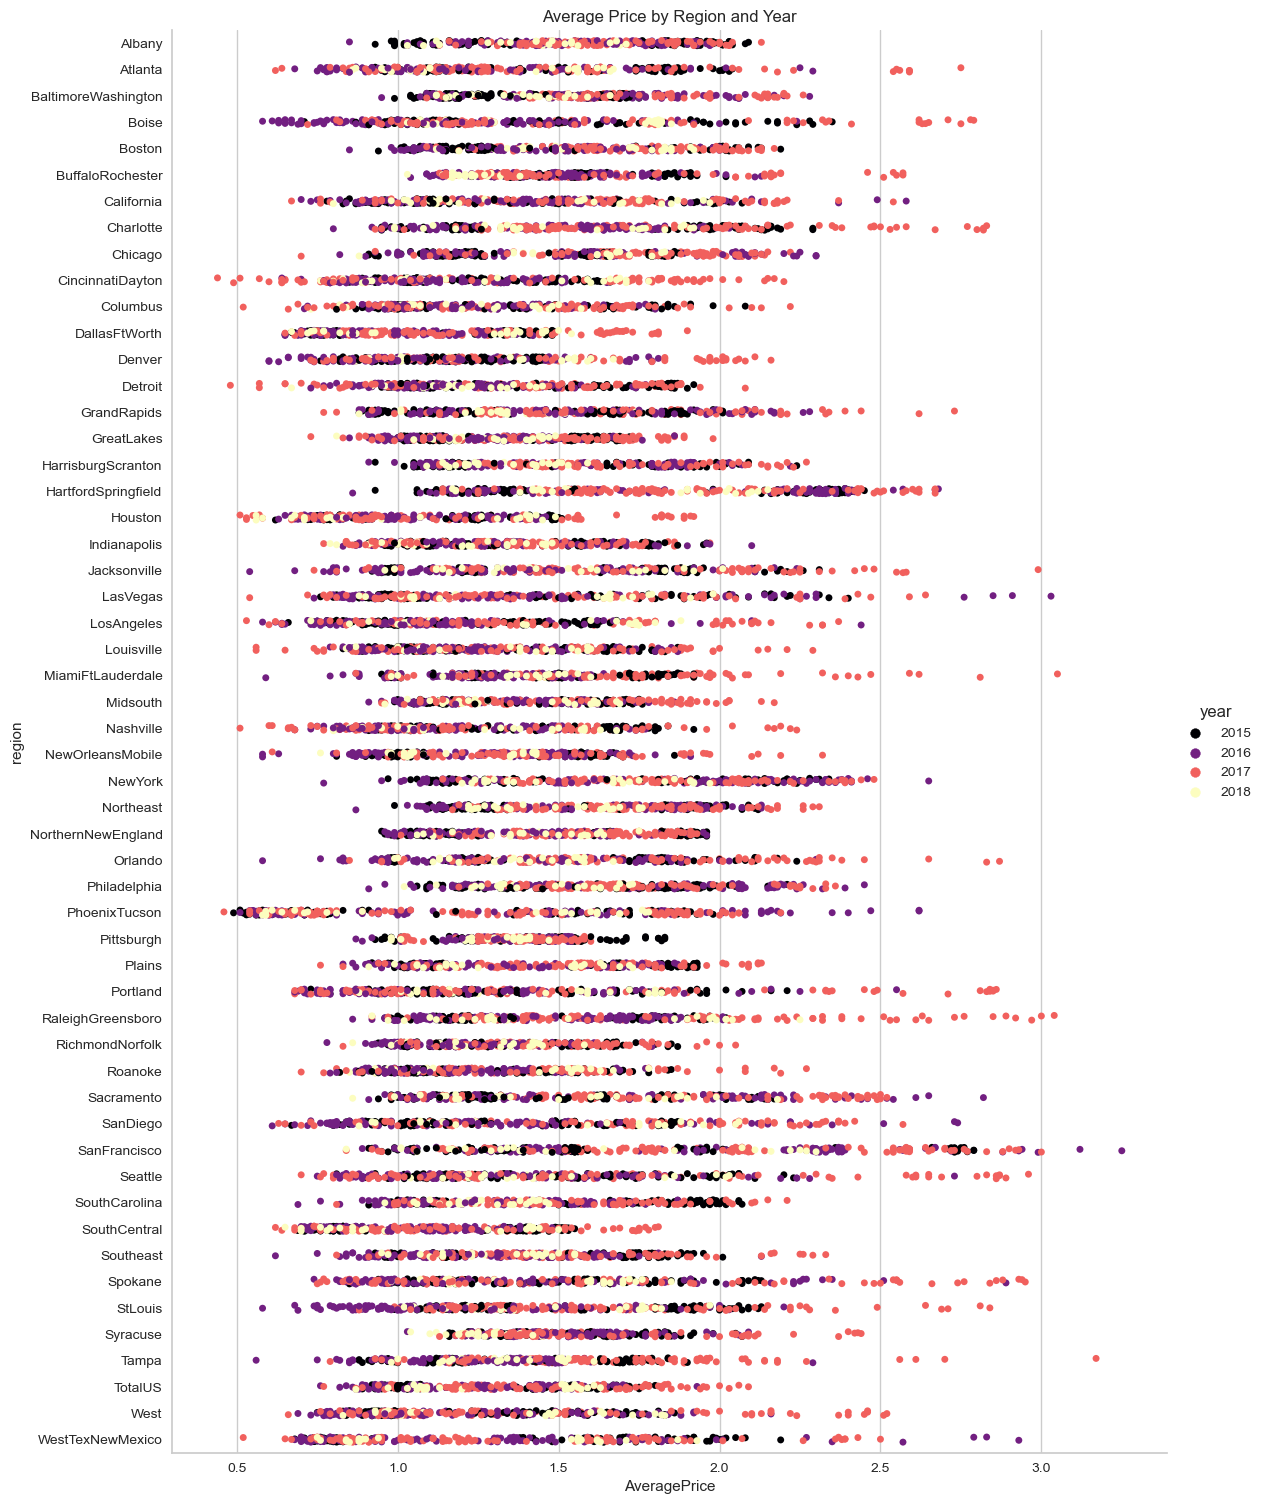

In [27]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
# Plotting with catplot
sns.catplot(
    x='AveragePrice', 
    y='region', 
    data=dataset,
    hue='year',
    aspect=0.8,
    height=15,
    palette='magma',
    kind='strip',  # equivalent to join=False in factorplot
)

plt.title('Average Price by Region and Year')
plt.show()

In [28]:
dataset_vif = dataset.copy()
dataset_vif.drop(columns=['Date','type','region'],inplace = True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

Xf = add_constant(dataset_vif)
pd.Series([variance_inflation_factor(Xf.values, i) 
               for i in range(Xf.shape[1])], 
              index=Xf.columns)

const           5.068485e+06
AveragePrice    1.099766e+00
Total Volume    4.918067e+09
4046            6.598339e+08
4225            5.978631e+08
4770            4.762133e+06
Total Bags      2.370316e+14
Small Bags      1.364727e+14
Large Bags      1.448103e+13
XLarge Bags     7.622174e+10
year            1.101665e+00
Month           1.071816e+00
Day             1.001467e+00
dtype: float64

<Axes: >

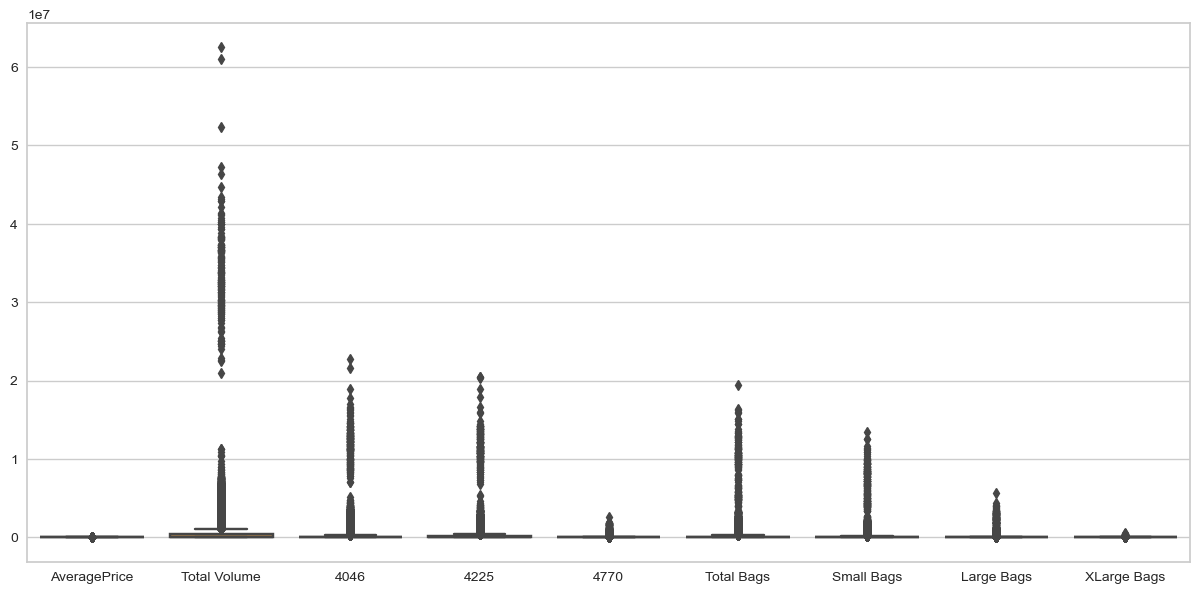

In [29]:
plt.figure(figsize=(15,7),dpi=100)
sns.boxplot(data = dataset[[
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags']])

In [30]:
dataset.drop(columns=["Date"],inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Month         18249 non-null  int32  
 13  Day           18249 non-null  int32  
dtypes: float64(9), int32(2), int64(1), object(2)
memory usage: 1.8+ MB


In [31]:
columns = dataset.columns
for j in columns:
    if isinstance(dataset[j][0], str) :
        continue
    else:
        #defining quartiles
        quartiles = percentile(dataset[j], [25,75])
        # calculate min/max
        lower_fence = quartiles[0] - (1.5*(quartiles[1]-quartiles[0]))
        upper_fence = quartiles[1] + (1.5*(quartiles[1]-quartiles[0]))
        dataset[j] = dataset[j].apply(lambda x: upper_fence if x > upper_fence else (lower_fence if x < lower_fence else x))

In [32]:
dataset.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


<Axes: >

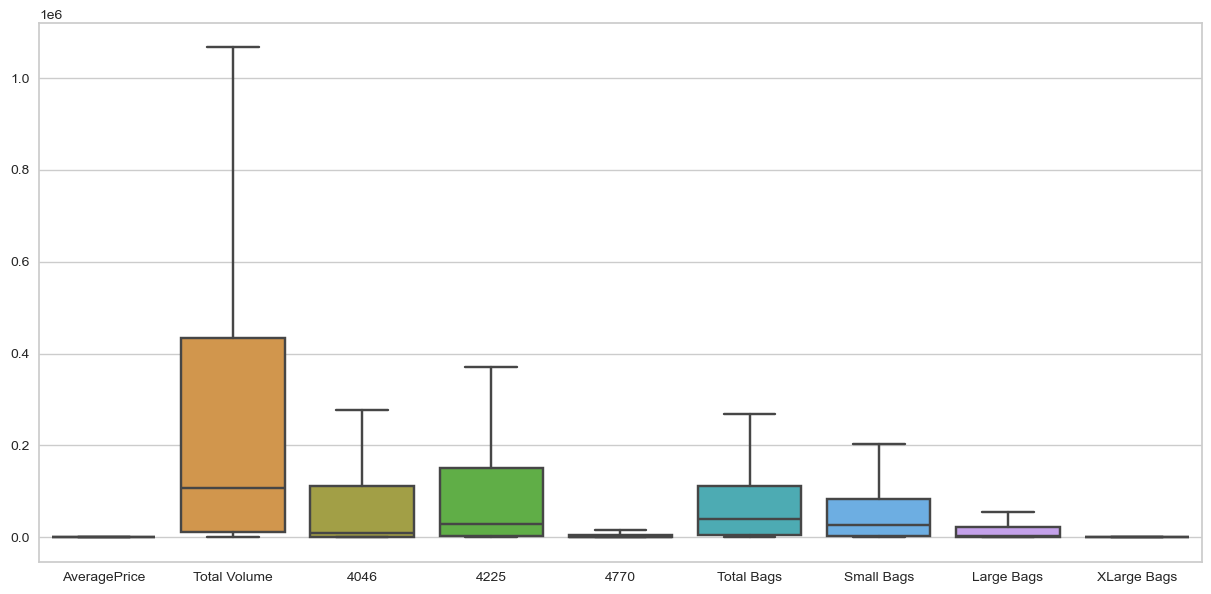

In [33]:
plt.figure(figsize=(15,7),dpi=100)
sns.boxplot(data = dataset[[
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags']])

In [34]:
dataset['region'] = pd.Categorical(dataset['region'])
dfDummies_region = pd.get_dummies(dataset['region'], prefix = 'region')
dfDummies_region

,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
18245,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
18246,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
18247,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [35]:
dataset = pd.concat([dataset, dfDummies_region], axis=1)
dataset.drop(columns="region",inplace=True)
dataset

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,...,False,False,False,False,False,False,False,False,False,False
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,...,False,False,False,False,False,False,False,False,False,False
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,...,False,False,False,False,False,False,False,False,False,False
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,...,False,False,False,False,False,False,False,False,False,False
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,...,False,False,False,False,False,False,False,False,False,True
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,...,False,False,False,False,False,False,False,False,False,True
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,...,False,False,False,False,False,False,False,False,False,True
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,...,False,False,False,False,False,False,False,False,False,True


In [36]:
dataset['Month'] = pd.Categorical(dataset['Month'])
dfDummies_month = pd.get_dummies(dataset['Month'], prefix = 'month')
dfDummies_month

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,False,True,False,False,False,False,False,False,False,False,False,False
18245,True,False,False,False,False,False,False,False,False,False,False,False
18246,True,False,False,False,False,False,False,False,False,False,False,False
18247,True,False,False,False,False,False,False,False,False,False,False,False


In [37]:
dataset = pd.concat([dataset, dfDummies_month], axis=1)
dataset.drop(columns="Month",inplace=True)
dataset

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,...,False,False,False,False,False,False,False,False,False,True
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,...,False,False,False,False,False,False,False,False,False,True
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,...,False,False,False,False,False,False,False,False,False,True
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,...,False,False,False,False,False,False,False,False,False,True
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,...,False,False,False,False,False,False,False,False,False,False
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,...,False,False,False,False,False,False,False,False,False,False
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,...,False,False,False,False,False,False,False,False,False,False
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,...,False,False,False,False,False,False,False,False,False,False


In [38]:
label_encoder = preprocessing.LabelEncoder() 
dataset['type']= label_encoder.fit_transform(dataset['type']) 
dataset

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,...,False,False,False,False,False,False,False,False,False,True
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,...,False,False,False,False,False,False,False,False,False,True
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,...,False,False,False,False,False,False,False,False,False,True
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,...,False,False,False,False,False,False,False,False,False,True
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,...,False,False,False,False,False,False,False,False,False,False
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,...,False,False,False,False,False,False,False,False,False,False
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,...,False,False,False,False,False,False,False,False,False,False
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,...,False,False,False,False,False,False,False,False,False,False


In [39]:
dataset.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,...,False,False,False,False,False,False,False,False,False,True
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,...,False,False,False,False,False,False,False,False,False,True
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,...,False,False,False,False,False,False,False,False,False,True
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,...,False,False,False,False,False,False,False,False,False,True
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,...,False,False,False,False,False,False,False,False,True,False


In [41]:
X=dataset.iloc[:,1:78]
y=dataset['AveragePrice']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)
y_test = np.array(y_test,dtype = float)

In [42]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [43]:
def regression_results(y_true, y_pred):
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    r2=metrics.r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1-r2)*(len(y_true)-1)/(len(y_true)-X_test.shape[1]-1)

    print('Explained_variance: ', round(explained_variance,4))    
    print('R2: ', round(r2,4))
    print('Adjusted_r2: ', round(adjusted_r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [44]:
def model_accuracy(model,X_train=X_train,y_train=y_train):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [45]:
#Linear Regression Model
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
regression_results(y_test,y_pred)
model_accuracy(regressor)

Explained_variance:  0.6665
R2:  0.6664
Adjusted_r2:  0.6592
MAE:  0.1779
MSE:  0.0541
RMSE:  0.2327
Accuracy: 64.15 %
Standard Deviation: 1.48 %


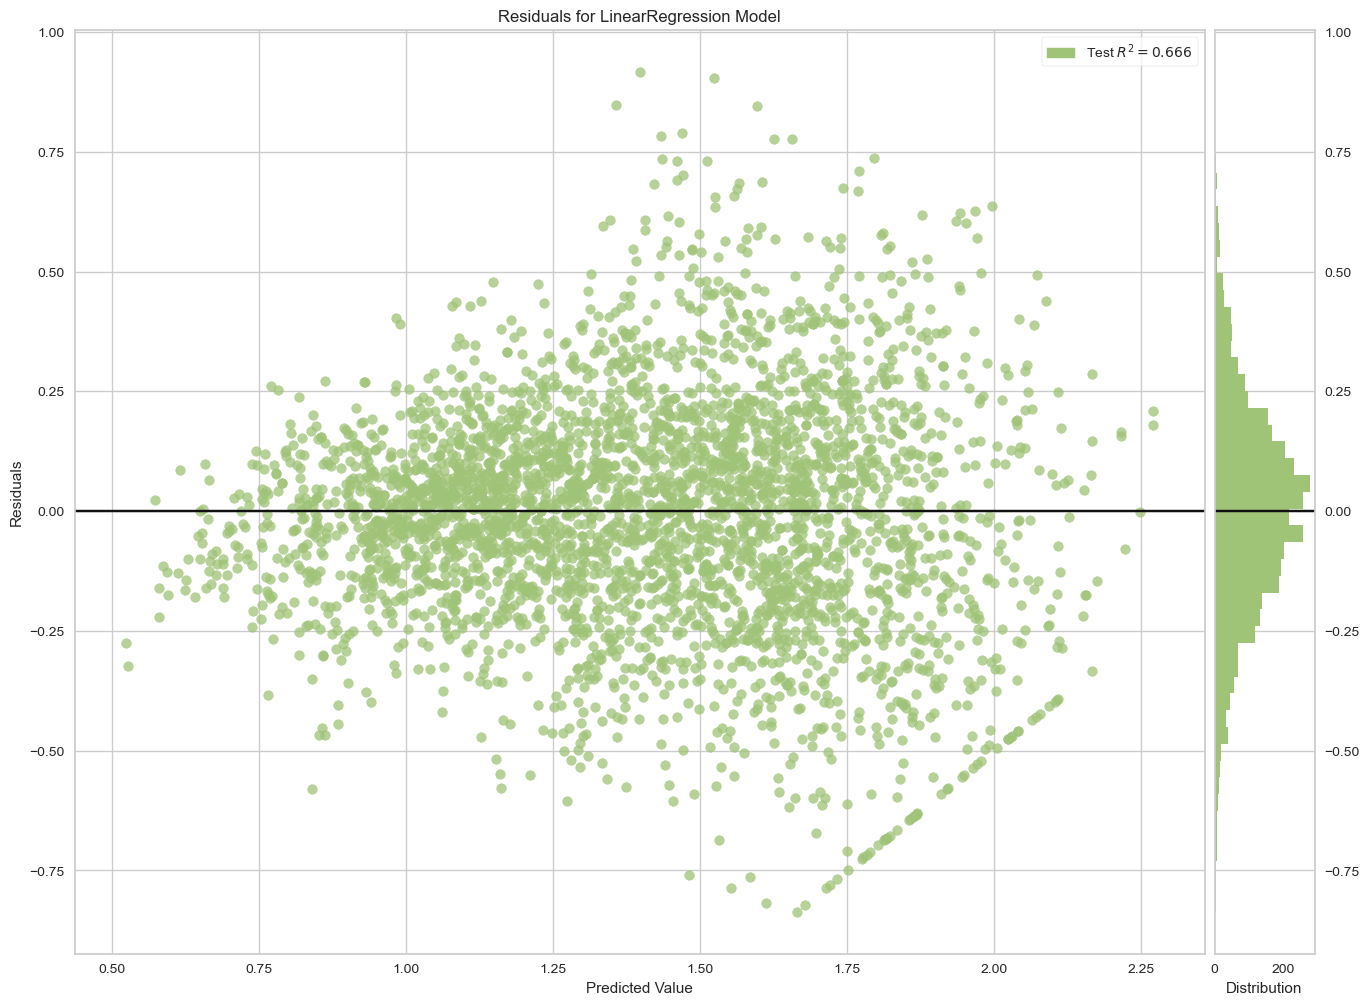

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [46]:
fig = plt.figure(figsize=(16, 12),dpi=100)
visualizer = ResidualsPlot(regressor, hist = True, qqplot = False)
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [47]:
rand_regressor = RandomForestRegressor()
rand_regressor.fit(X_train, y_train)
y_pred_rf = rand_regressor.predict(X_test)
regression_results(y_test,y_pred_rf)
model_accuracy(rand_regressor)

Explained_variance:  0.9046
R2:  0.9046
Adjusted_r2:  0.9025
MAE:  0.0893
MSE:  0.0155
RMSE:  0.1244
Accuracy: 88.55 %
Standard Deviation: 0.57 %


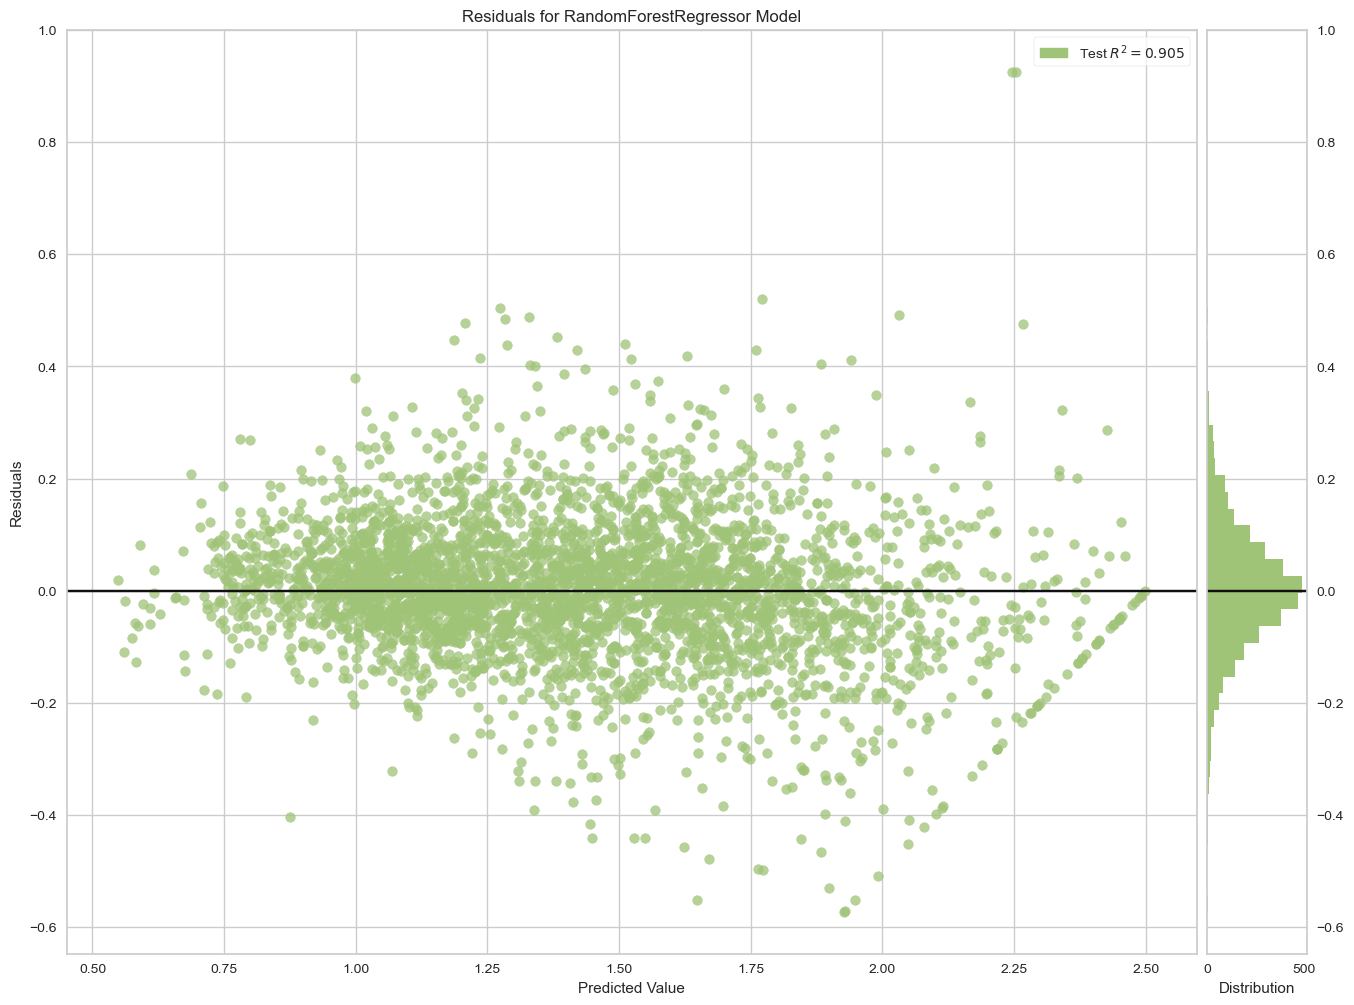

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [48]:
fig = plt.figure(figsize=(16, 12),dpi=100)
visualizer = ResidualsPlot(rand_regressor, hist = True, qqplot = False)
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

<h1> conclusion- using k-fold cross validation as the basis for model selection we declare random forest model as the best suited model for our purpose of predicting average avocado prices. <h1>